In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [4]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [5]:
# Checking for null values 
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

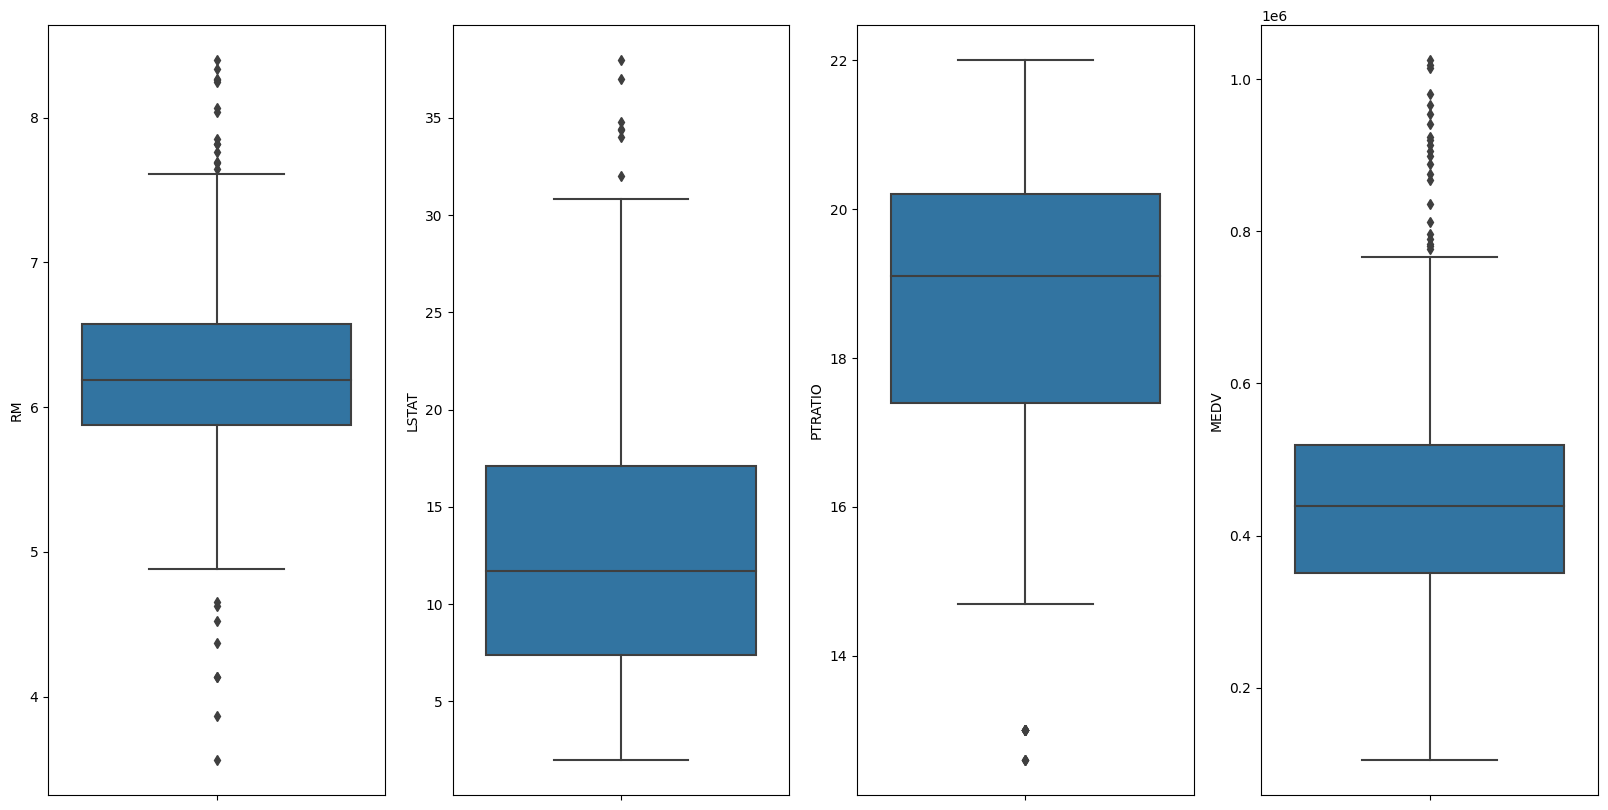

In [6]:
#EDA - checking outliers

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1 

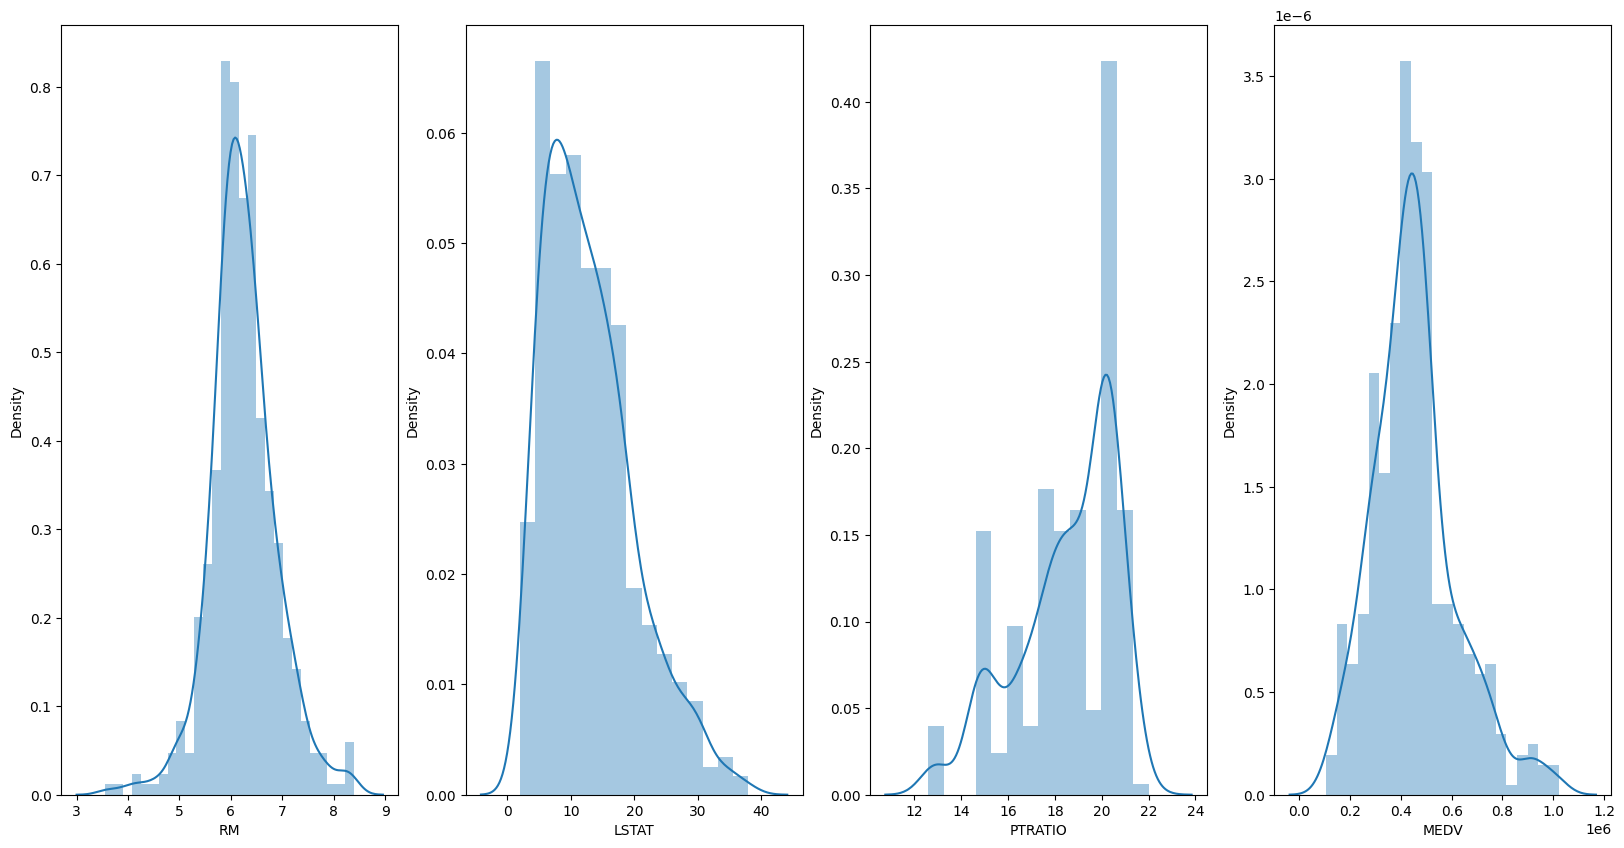

In [8]:
# checking for Skewness of the data

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1 

<Axes: >

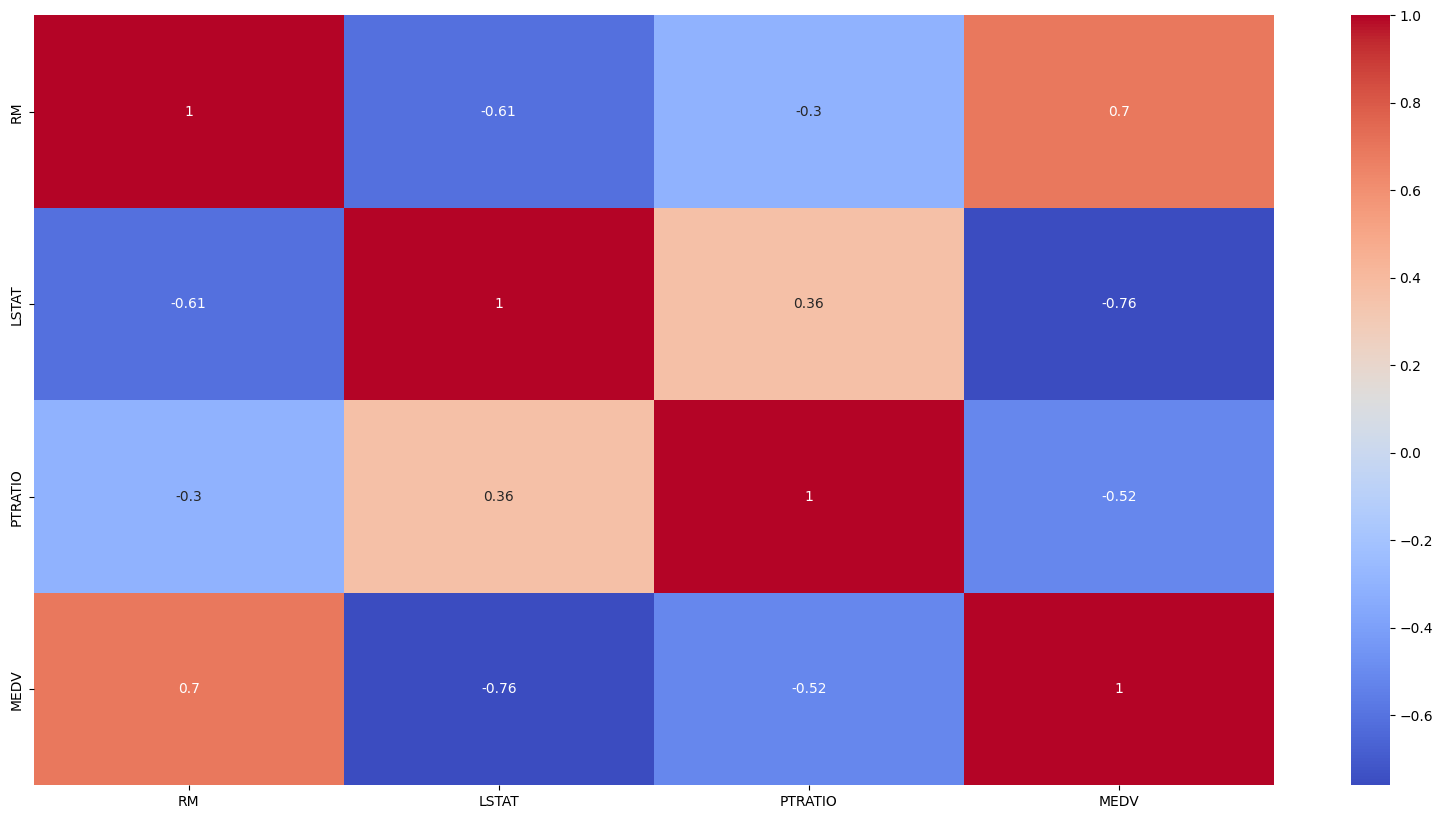

In [10]:
#checking corelation Matrix

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

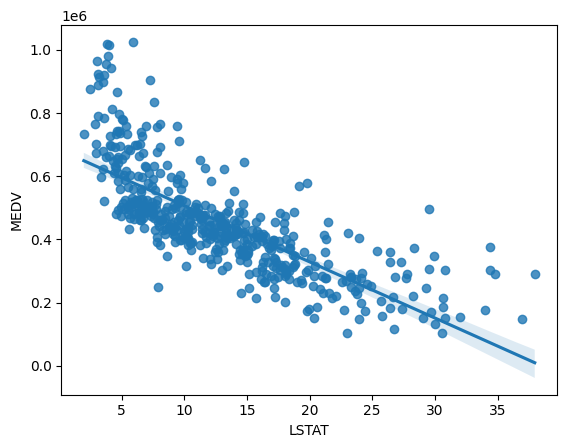

In [11]:
sns.regplot(x=df['LSTAT'],y=df['MEDV'])

Here we can se that they both are -vely related. 
As we can see LSAT increases price decreases.

<Axes: xlabel='RM', ylabel='MEDV'>

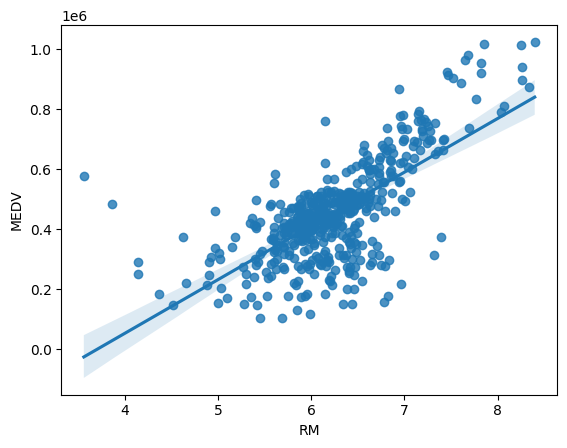

In [12]:
sns.regplot(x=df['RM'],y=df['MEDV'])

Conclusion : As the number of room increases the prices also increases.

In [13]:
# As the data has multiple columns as input and one output . we will be using multiple linear Regression

In [14]:
from sklearn.model_selection import train_test_split

x=df.iloc[:,0:3]
y=df.iloc[:,-1]
x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [15]:
X_train ,X_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
clf = LinearRegression()
clf.fit(X_train , y_train)

LinearRegression()

In [18]:
clf.predict(X_test)

array([242738.80294309, 698130.12349858, 446732.22173036, 338364.50879649,
       486329.62819077, 593992.67813243, 345623.49420261, 335546.21678312,
       486845.97247071, 313925.27945597, 406895.71007556, 373420.3471004 ,
       645209.34208475, 392707.91466035, 508940.67420953, 448248.24573436,
       494135.75417299, 531579.31399782, 186225.85672697, 393704.73382953,
       443469.20665893, 336809.42037549, 551973.53428182, 569267.74086055,
       418772.46445908, 533637.94269574, 492467.54950094, 513126.9947955 ,
       419189.44028967, 426768.49498853, 444498.86168807, 347441.27755789,
       433081.2279073 , 650977.84418348, 403486.51570422, 481753.53888808,
       281024.49071071, 494535.71526704, 372178.14928952, 362867.91693995,
       239052.30217675, 679433.55303706, 678790.3375221 , 454989.89140207,
       404270.63294301, 387155.76763988, 661688.84034091, 439772.31794372,
       419047.63869035, 639860.62215846, 309010.3168991 , 536668.13932286,
       289825.17028287, 5

In [20]:
clf.score(X_test , y_test)

0.7282583350680776

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MDE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 59915.665711467795
MDE 7069589395.384465
R2 score 0.7282583350680776


In [24]:
clf.coef_

array([ 95161.99685332,  -9795.04368119, -19036.92174371])

In [25]:
clf.intercept_

339212.61065935955